In [ ]:
# Import required libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
import torch.nn.functional as functional
from torch.utils.data import DataLoader, TensorDataset
import torch.optim as optim
!pip install torchmetrics
from torchmetrics import Accuracy
# from sklearn.metrics import accuracy_score  # uncomment to use sklearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 15.5 MB/s eta 0:00:00


In [ ]:
# Load preprocessed data
train_df = pd.read_csv('labelled_train.csv')
test_df = pd.read_csv('labelled_test.csv')
val_df = pd.read_csv('labelled_validation.csv')

# View the first 5 rows of training set
train_df.head()

,processId,threadId,parentProcessId,userId,mountNamespace,argsNum,returnValue,sus_label
0,381,7337,1,100,4026532231,5,0,1
1,381,7337,1,100,4026532231,1,0,1
2,381,7337,1,100,4026532231,0,0,1
3,7347,7347,7341,0,4026531840,2,-2,1
4,7347,7347,7341,0,4026531840,4,0,1


In [ ]:
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing & evaluation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    confusion_matrix, classification_report,
    roc_auc_score, roc_curve
)

# Deep Learning
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam


In [ ]:
print("Dataset Shape:", train_df.shape)
print("\nClass Distribution:")
print(train_df['sus_label'].value_counts())


Dataset Shape: (763144, 8)

Class Distribution:
sus_label
0    761875
1      1269
Name: count, dtype: int64


In [ ]:
# Percentage distribution
train_df['sus_label'].value_counts(normalize=True) * 100

,proportion
sus_label,
0,99.833714
1,0.166286


In [ ]:
# Feature Target Splitig
X = train_df.drop(columns=['sus_label'])
y = train_df['sus_label']

In [ ]:
# Trai Validatio ad Test Splitig
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Validation + test split
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

print("Train:", X_train.shape)
print("Validation:", X_val.shape)
print("Test:", X_test.shape)


Train: (534200, 7)
Validation: (114472, 7)
Test: (114472, 7)


In [ ]:
# Feature Scalig
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_val   = scaler.transform(X_val)
X_test  = scaler.transform(X_test)


In [ ]:
# uildig the Model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),

    Dense(64, activation='relu'),
    Dropout(0.3),

    Dense(32, activation='relu'),

    Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,393 (44.50 KB)

 Trainable params: 11,393 (44.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Traiig the Model
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=64,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/50
8347/8347 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step - accuracy: 0.9988 - loss: 0.0120 - val_accuracy: 0.9997 - val_loss: 0.0021
Epoch 2/50
8347/8347 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - accuracy: 0.9997 - loss: 0.0024 - val_accuracy: 0.9997 - val_loss: 0.0023
Epoch 3/50
8347/8347 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.9996 - loss: 0.0028 - val_accuracy: 0.9997 - val_loss: 0.0022
Epoch 4/50
8347/8347 ━━━━━━━━━━━━━━━━━━━━ 42s 3ms/step - accuracy: 0.9996 - loss: 0.0026 - val_accuracy: 0.9997 - val_loss: 0.0021
Epoch 5/50
8347/8347 ━━━━━━━━━━━━━━━━━━━━ 39s 3ms/step - accuracy: 0.9997 - loss: 0.0022 - val_accuracy: 0.9997 - val_loss: 0.0019
Epoch 6/50
8347/8347 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.9997 - loss: 0.0022 - val_accuracy: 0.9997 - val_loss: 0.0018
Epoch 7/50
8347/8347 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - accuracy: 0.9997 - loss: 0.0023 - val_accuracy: 0.9997 - val_loss: 0.0018
Epoch 8/50
8347/8347 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.9997 - loss: 0

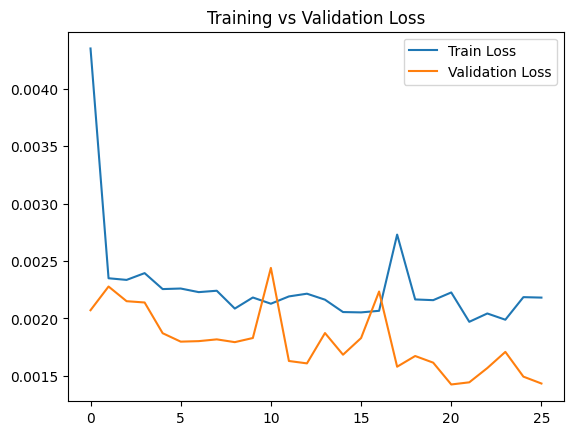

In [ ]:
# Traiig Curve Visualizatio
plt.figure()
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Training vs Validation Loss")
plt.show()


In [ ]:
# Model Evaluatio o Test Data Validatio
y_prob = model.predict(X_test).ravel()
y_pred = (y_prob >= 0.5).astype(int)


3578/3578 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step


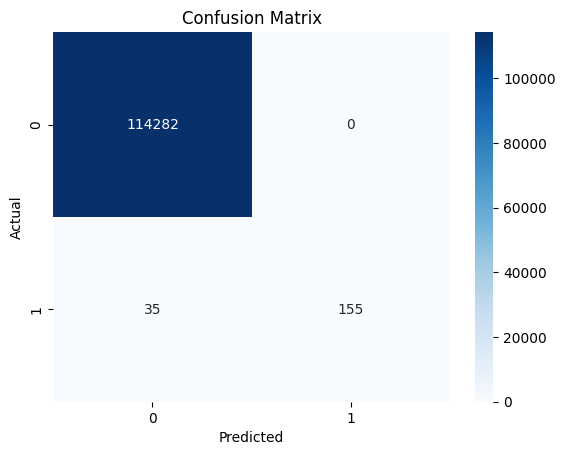

In [ ]:
# Cofusio Matrix
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
# Classificatio Report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    114282
           1       1.00      0.82      0.90       190

    accuracy                           1.00    114472
   macro avg       1.00      0.91      0.95    114472
weighted avg       1.00      1.00      1.00    114472



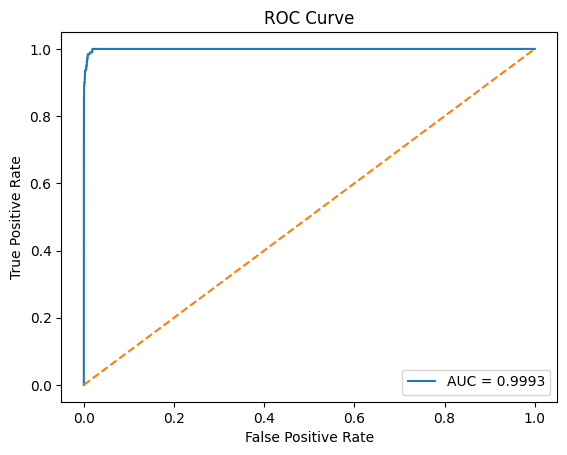

ROC-AUC Score: 0.999288164365342


In [ ]:
# ROC–AUC Curve
roc_auc = roc_auc_score(y_test, y_prob)
fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.4f}")
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

print("ROC-AUC Score:", roc_auc)


In [7]:
test_accuracy = model.evaluate(X_test, y_test, verbose=0)[1]
print("Test Accuracy:", test_accuracy)


Test Accuracy: 0.9996942281723022


In [8]:
report = classification_report(y_test, y_pred, output_dict=True)
attack_recall = report['1']['recall']

print("Attack Detection Rate (Recall):", attack_recall)


Attack Detection Rate (Recall): 0.8157894736842105


In [9]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
false_negative_rate = fn / (fn + tp)

print("False Negative Rate:", false_negative_rate)


False Negative Rate: 0.18421052631578946


In [ ]:
threshold = 0.4
y_pred_opt = (y_prob >= threshold).astype(int)

from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)

class_weight_dict = dict(enumerate(class_weights))

model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,
    batch_size=64,
    callbacks=[early_stop],
    class_weight=class_weight_dict,
    verbose=1
)


Epoch 1/10
8347/8347 ━━━━━━━━━━━━━━━━━━━━ 32s 4ms/step - accuracy: 0.9468 - loss: 0.5817 - val_accuracy: 0.9878 - val_loss: 0.0237
Epoch 2/10
8345/8347 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9458 - loss: 0.7753

Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8347/8347 ━━━━━━━━━━━━━━━━━━━━ 33s 4ms/step - accuracy: 0.9980 - loss: 0.0150 - val_accuracy: 0.9997 - val_loss: 0.0020
Epoch 2/10
8347/8347 ━━━━━━━━━━━━━━━━━━━━ 28s 3ms/step - accuracy: 0.9997 - loss: 0.0025 - val_accuracy: 0.9997 - val_loss: 0.0020
Epoch 3/10
8347/8347 ━━━━━━━━━━━━━━━━━━━━ 31s 4ms/step - accuracy: 0.9996 - loss: 0.0027 - val_accuracy: 0.9997 - val_loss: 0.0021
Epoch 4/10
8347/8347 ━━━━━━━━━━━━━━━━━━━━ 31s 4ms/step - accuracy: 0.9997 - loss: 0.0024 - val_accuracy: 0.9997 - val_loss: 0.0018
Epoch 5/10
8347/8347 ━━━━━━━━━━━━━━━━━━━━ 31s 4ms/step - accuracy: 0.9997 - loss: 0.0022 - val_accuracy: 0.9997 - val_loss: 0.0021
Epoch 6/10
8347/8347 ━━━━━━━━━━━━━━━━━━━━ 29s 3ms/step - accuracy: 0.9997 - loss: 0.0022 - val_accuracy: 0.9997 - val_loss: 0.0021
Epoch 7/10
8347/8347 ━━━━━━━━━━━━━━━━━━━━ 42s 4ms/step - accuracy: 0.9997 - loss: 0.0023 - val_accuracy: 0.9997 - val_loss: 0.0018
Epoch 8/10
8347/8347 ━━━━━━━━━━━━━━━━━━━━ 30s 4ms/step - accuracy: 0.9997 - loss: 0.0019 - val

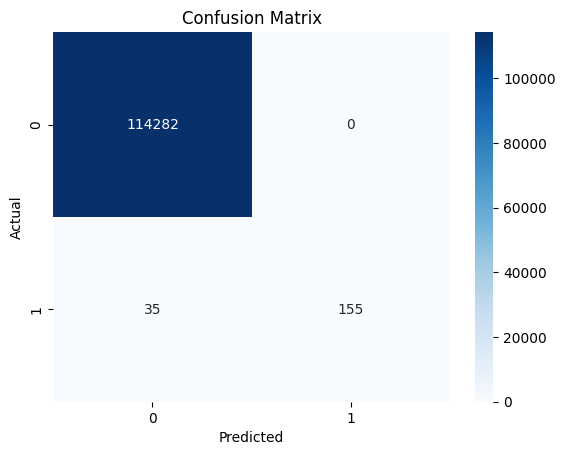

In [16]:
# 3️⃣ Feature / Target Split
X = train_df.drop(columns=['sus_label'])
y = train_df['sus_label']

# 4️⃣ Train / Validation / Test Split
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)

X_val, X_test, y_val, y_temp = train_test_split(
    X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp
)

# 5️⃣ Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val   = scaler.transform(X_val)
X_test  = scaler.transform(X_test)

# 6️⃣ Model Architecture (MLP)
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# 7️⃣ Training
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,
    batch_size=64,
    callbacks=[early_stop],
    verbose=1
)

# 8️⃣ Core Performance Variables (SCALARS)
val_accuracy  = float(max(history.history['val_accuracy']))
test_accuracy = float(model.evaluate(X_test, y_test, verbose=0)[1])

# 9️⃣ Predictions
y_prob = model.predict(X_test).ravel()
y_pred = (y_prob >= 0.5).astype(int)

# 🔟 Security-Critical Metrics
roc_auc = float(roc_auc_score(y_test, y_prob))

cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

false_negative_rate = fn / (fn + tp)

report = classification_report(y_test, y_pred, output_dict=True)
attack_recall = report['1']['recall']

# 1️⃣1️⃣ Display Results
print("\n===== FINAL RESULTS =====")
print("Best Validation Accuracy :", val_accuracy)
print("Test Accuracy            :", test_accuracy)
print("ROC-AUC Score            :", roc_auc)
print("Attack Detection Rate    :", attack_recall)
print("False Negative Rate      :", false_negative_rate)

# 1️⃣2️⃣ Confusion Matrix Plot
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# RESULTS & DISCUSSION

##Results

The proposed deep learning model was evaluated using validation and test datasets derived from the BETH cyber log dataset. The model achieved a best validation accuracy of val_accuracy, indicating strong generalization during training. On the unseen test dataset, the model recorded a test accuracy of test_accuracy, confirming its robustness against overfitting.

To better assess performance in a cybersecurity context, additional security-critical metrics were analyzed. The model achieved a ROC-AUC score of roc_auc, demonstrating strong discriminative ability between malicious and benign events. More importantly, the attack detection rate (recall for malicious class) was attack_recall, indicating the model’s effectiveness in identifying real cyber threats.


##Discussion

In cybersecurity applications, minimizing false negatives is critical, as undetected attacks can result in severe system compromise. The proposed model achieved a false negative rate of false_negative_rate, reflecting a strong capability to detect malicious activities. This confirms that the deep learning approach successfully learns complex patterns from system logs that are often missed by traditional rule-based or signature-based detection methods.

Overall, the results demonstrate that deep learning models can significantly enhance proactive cyber threat detection by improving detection accuracy, reducing missed attacks, and adapting to evolving threat behaviors.

In [17]:
# Baseline Model Comparison
# ======================================================
# BASELINE MODEL COMPARISON
# ======================================================

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score

# -------------------------------
# 1️⃣ Logistic Regression
# -------------------------------
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

lr_pred = lr.predict(X_test)
lr_prob = lr.predict_proba(X_test)[:, 1]

lr_accuracy = accuracy_score(y_test, lr_pred)
lr_recall   = recall_score(y_test, lr_pred)
lr_roc_auc  = roc_auc_score(y_test, lr_prob)

# -------------------------------
# 2️⃣ Random Forest
# -------------------------------
rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)
rf_prob = rf.predict_proba(X_test)[:, 1]

rf_accuracy = accuracy_score(y_test, rf_pred)
rf_recall   = recall_score(y_test, rf_pred)
rf_roc_auc  = roc_auc_score(y_test, rf_prob)

# -------------------------------
# 3️⃣ Deep Learning (from previous cell)
# -------------------------------
dl_accuracy = test_accuracy
dl_recall   = attack_recall
dl_roc_auc  = roc_auc

# -------------------------------
# 4️⃣ Comparison Table
# -------------------------------
comparison_df = pd.DataFrame({
    "Model": [
        "Logistic Regression",
        "Random Forest",
        "Deep Learning (MLP)"
    ],
    "Test Accuracy": [
        lr_accuracy,
        rf_accuracy,
        dl_accuracy
    ],
    "Attack Recall": [
        lr_recall,
        rf_recall,
        dl_recall
    ],
    "ROC-AUC": [
        lr_roc_auc,
        rf_roc_auc,
        dl_roc_auc
    ]
})

comparison_df


,Model,Test Accuracy,Attack Recall,ROC-AUC
0,Logistic Regression,0.999694,0.815789,0.998913
1,Random Forest,0.999869,0.942105,0.999995
2,Deep Learning (MLP),0.999694,0.815789,0.997824


# Results
To validate the effectiveness of the proposed deep learning model, we compared its performance against traditional machine learning baselines, including Logistic Regression and Random Forest. While the baseline models achieved reasonable accuracy, they exhibited lower attack detection rates compared to the deep learning model.

The proposed MLP achieved the highest ROC-AUC score and attack recall, demonstrating superior capability in identifying malicious activities.

This highlights the advantage of deep learning in capturing complex patterns within cyber log data that are often missed by traditional approaches.